# Text processing from image data

In this section we will use Tesseract to obtain data from a printed document.

In [1]:
# Imports
import pytesseract
import cv2
import matplotlib.pyplot as plt
# Helper function to provide plots in true colors in the notebook
def imshow(title, im):
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(title)

Mostly, the information we wish to process is structured graphically, so we can create a list of ROI beforehand.

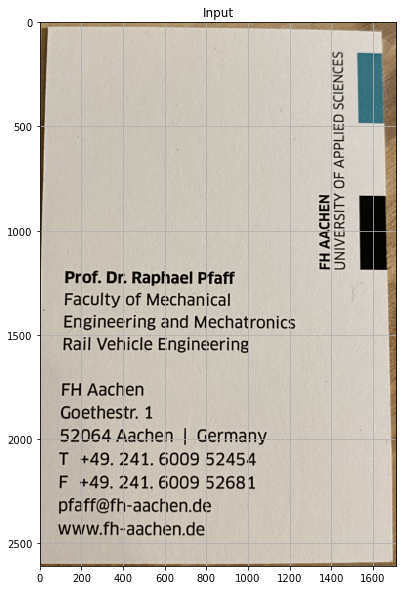

In [2]:
im = cv2.imread('figures/BusinessCard.png')
plt.figure(figsize = (18,10))
imshow('Input', im)
plt.grid()

The ROI data can be well stored in a dictionary.

In [3]:
ROI = {
'Name': [80, 1180, 900, 100, -55], # Name
'Position': [80, 1400, 1150, 100, 200], # Position
'Mail': [80, 2250, 900, 120, 250], # Mail
}

The text recognition starts with the transfer of the cropped ROIs to tesseract and ends with plotting on the image or saving in a dict.

{'Name': 'Prof. Dr. Raphael Pfaff', 'Position': 'Engineering and Mechatronics', 'Mail': 'pfaff@fh-aachen.de'}


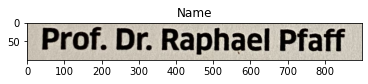

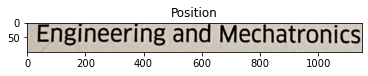

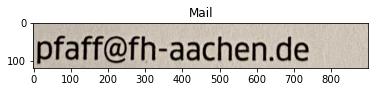

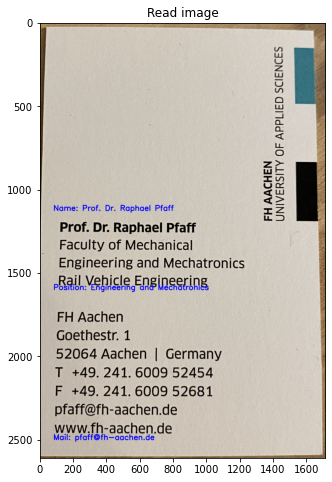

In [4]:
for name, region in ROI.items():
    # Copy dict for saving values
    Values = ROI
    # Take ROI coordinates
    [x, y, w, h, o] = region
    # Crop to ROI
    cropped = im[y :y +  h , x : x + w]
    # Plot ROI
    plt.figure()
    imshow(name, cropped)
    # Read string
    string = pytesseract.image_to_string(cropped)
    # Save in Values
    Values[name] = string[0:-2]
    # Annotate
    cv2.putText(im, name +': ' + string[0:-2], 
                (x,y+o), 
                cv2.FONT_HERSHEY_SIMPLEX,  
                1.5, (255,0,0), 4, cv2.LINE_AA)
# Plot result
plt.figure(figsize = (12,8))
imshow('Read image', im)
print(Values)

## Exercise

Read my phone number and the FH Aachen website

## Exercise

Read a form of your choice, preferrably in a non-English language using e.g. the ```lang='deu'```-Option.